# PREPROSESSING OULAD

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ass = pd.read_csv('assessments.csv')
cor = pd.read_csv('courses.csv')
sa = pd.read_csv('studentAssessment.csv')
si = pd.read_csv('studentInfo.csv')
sr = pd.read_csv('studentRegistration.csv')
svle = pd.read_csv('studentVle.csv')
vle = pd.read_csv('vle.csv')

#### asessments

In [27]:
ass

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [46]:
ass.info()
ass.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


,id_assessment,date,weight
count,206.000000,195.000000,206.000000
mean,26473.975728,145.005128,20.873786
std,10098.625521,76.001119,30.384224
min,1752.000000,12.000000,0.000000
25%,15023.250000,71.000000,0.000000
50%,25364.500000,152.000000,12.500000
75%,34891.750000,222.000000,24.250000
max,40088.000000,261.000000,100.000000


In [47]:
ass.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [83]:
ass = ass.drop('date', axis=1)

In [84]:
ass.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
weight                24
dtype: int64

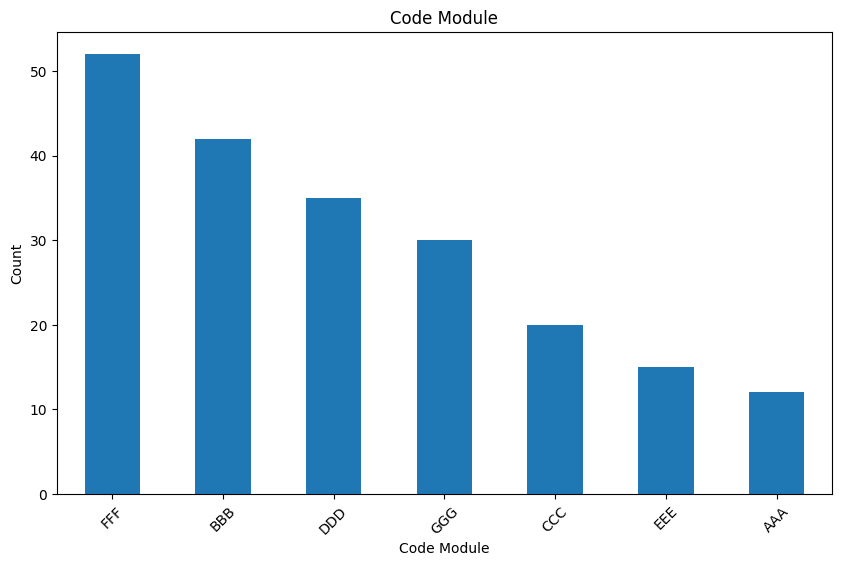

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya, Anda memiliki DataFrame 'df' dengan kolom 'code_module'
counts = ass['code_module'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.xlabel('Code Module')
plt.ylabel('Count')
plt.title('Code Module')
plt.xticks(rotation=45)  # Untuk memutar label sumbu x jika diperlukan
plt.show()


Code module terbanyak terdapat pada code module FFF dengan total lebih dari 50

<Axes: xlabel='code_presentation'>

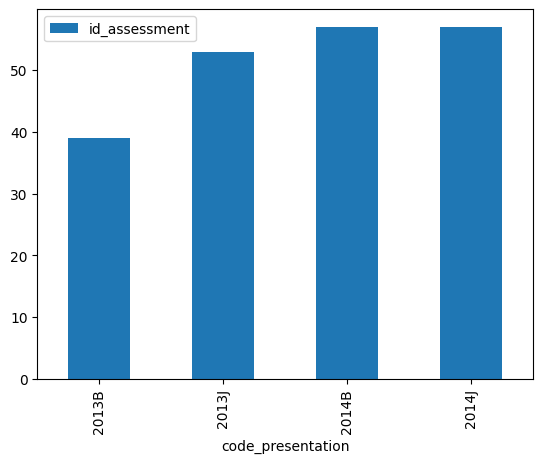

In [56]:
ass[['id_assessment','code_presentation']].groupby(by='code_presentation').count().plot.bar()


code presentation terbanyak yaitu 2014 B dan J, sedangkan terendah pada 2013 B

In [163]:
ass.groupby(['code_module', 'code_presentation']).agg(total_weigth=('weight', sum))

total_weigth
code_module code_presentation              
AAA         2013J                     200.0
            2014J                     200.0
BBB         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
CCC         2014B                     300.0
            2014J                     300.0
DDD         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
EEE         2013J                     200.0
            2014B                     200.0
            2014J                     200.0
FFF         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
GGG         2013J                     100.0
            2014B                     100.0
            2014J                     100.0

mayoritas pembobotannya adalah diangka 200. tetapi pada modul CCC dan GGG terdapat kekeliruan yang mana bobot pada modul CCC adalah 300 untuk tiap presentation dan pada modul GGG hanya 100 bobotnya. selanjut harus di teliti lebih dalam untuk pembagian bobot pada tipe asesmennya

#### course

In [33]:
cor

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [61]:
cor.info()
cor.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


,module_presentation_length
count,22.000000
mean,255.545455
std,13.654677
min,234.000000
25%,241.000000
50%,261.500000
75%,268.000000
max,269.000000


In [64]:
cor.nunique()

code_module                   7
code_presentation             4
module_presentation_length    7
dtype: int64

In [68]:
cor.isnull().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

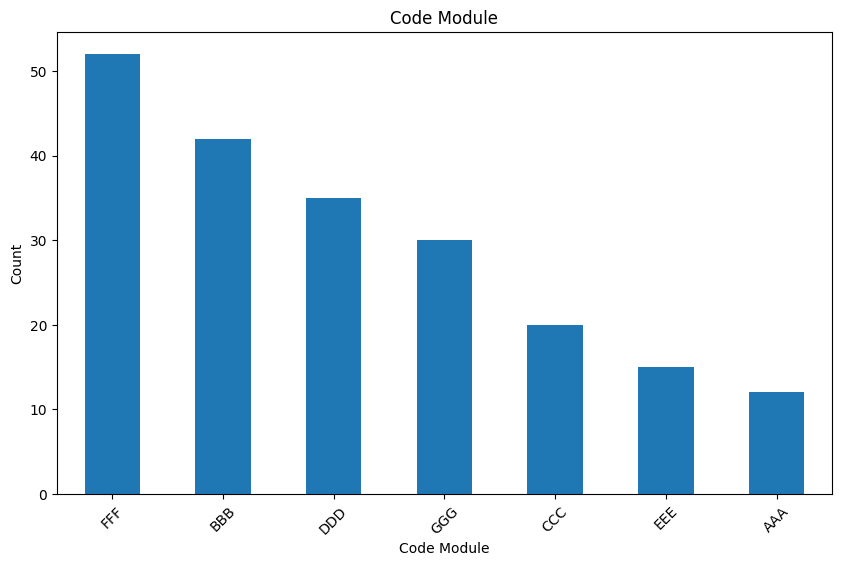

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

counts = ass['code_module'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.xlabel('Code Module')
plt.ylabel('Count')
plt.title('Code Module')
plt.xticks(rotation=45)  
plt.show()

Code module terbanyak terdapat pada code module FFF dengan total lebih dari 50

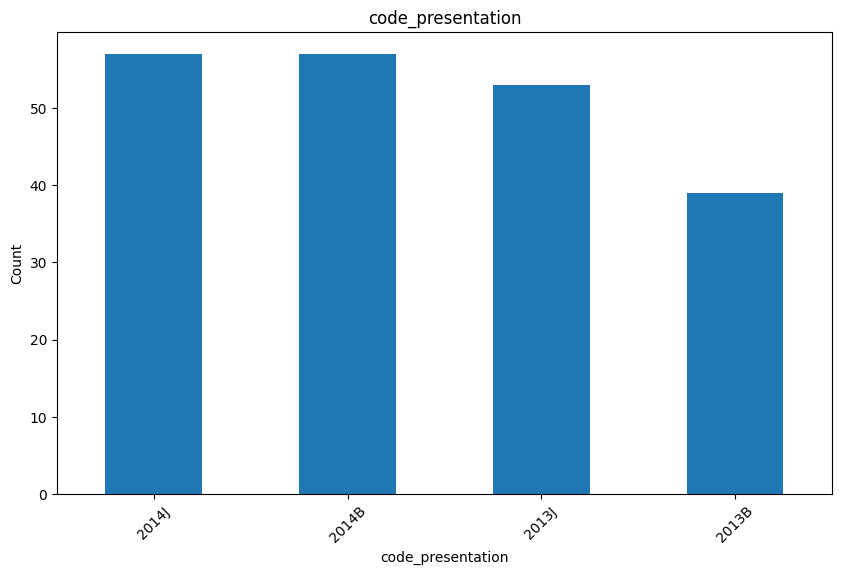

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

counts = ass['code_presentation'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.xlabel('code_presentation')
plt.ylabel('Count')
plt.title('code_presentation')
plt.xticks(rotation=45)  
plt.show()

code presentation terbanyak yaitu 2014 B dan J, sedangkan terendah pada 2013 B

<Axes: xlabel='module_presentation_length'>

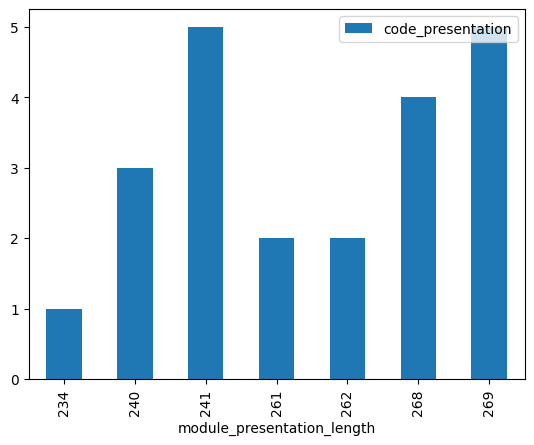

In [71]:
cor[['module_presentation_length','code_presentation']].groupby(by='module_presentation_length').count().plot.bar()


total panjang kode presentasi terbanyak yaitu 241 dan J269, sedangkan terendah pada 234

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


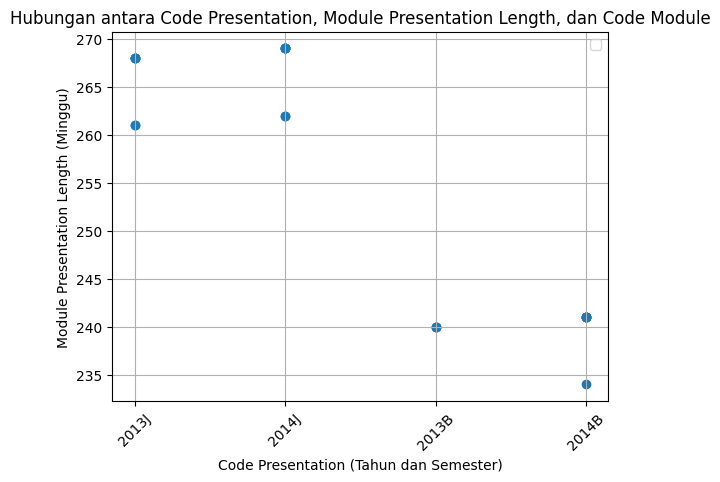

In [80]:
plt.scatter(cor['code_presentation'], cor['module_presentation_length'])

plt.xlabel('Code Presentation (Tahun dan Semester)')
plt.ylabel('Module Presentation Length (Minggu)')
plt.title('Hubungan antara Code Presentation, Module Presentation Length, dan Code Module')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### studentAssessment

In [82]:
sa

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [87]:
sa.info()
sa.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


In [88]:
sa.nunique()

id_assessment       188
id_student        23369
date_submitted      312
is_banked             2
score               101
dtype: int64

In [101]:
sa.isnull().sum()

id_assessment     0
id_student        0
date_submitted    0
is_banked         0
score             0
dtype: int64

mengisi nilai kosong dengan rata rata pada fitur SCORE

In [102]:
sa['score'].fillna(sa['score'].mean(), inplace=True)

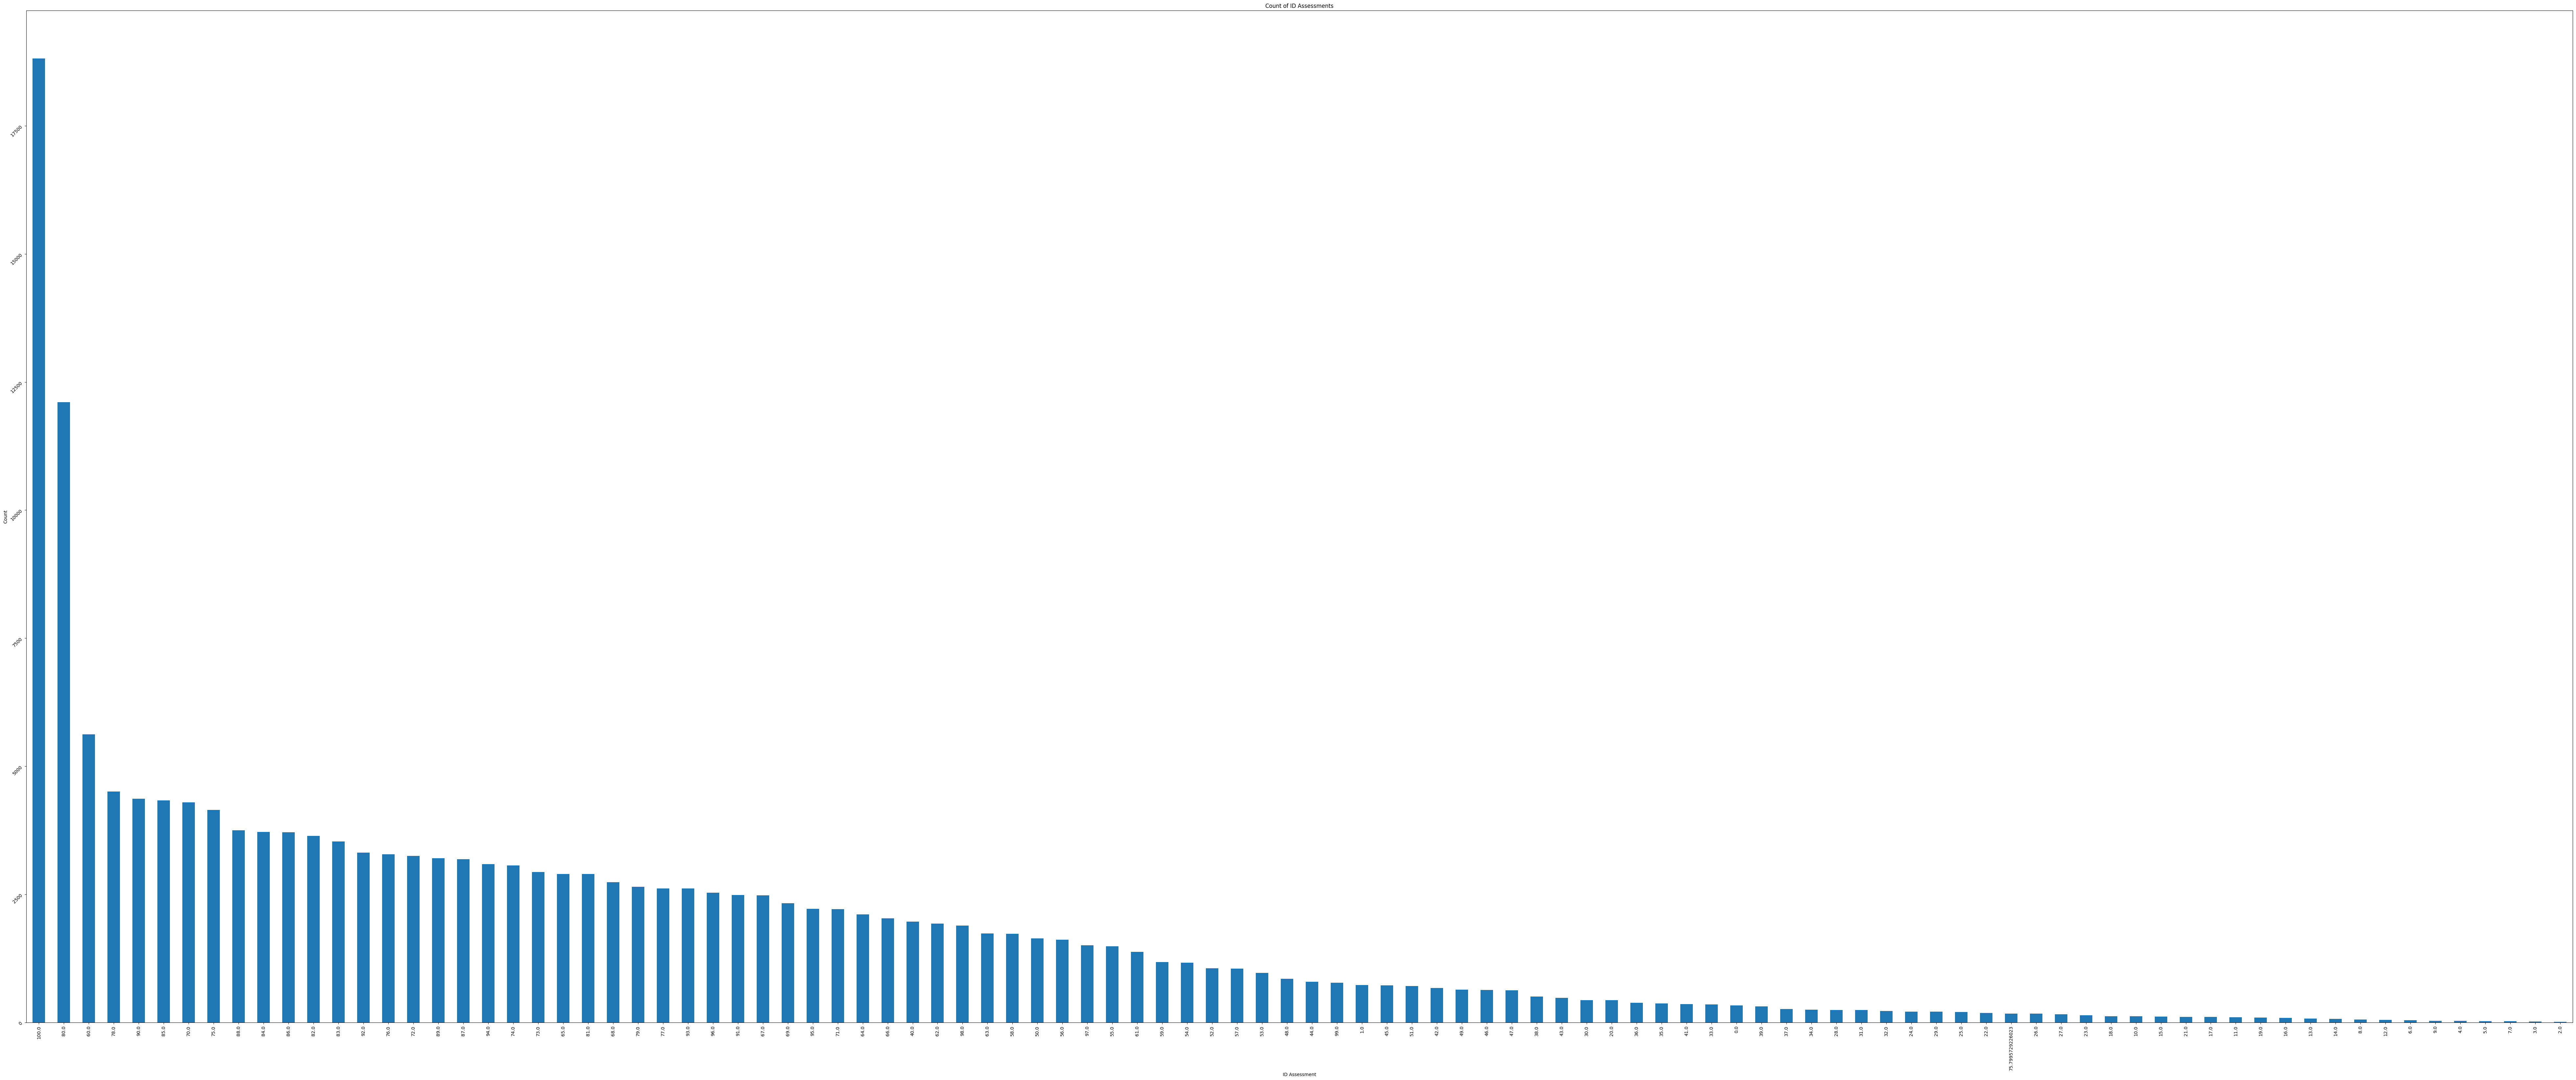

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya, Anda memiliki DataFrame 'ass' dengan kolom 'id_assessment'
counts = sa['score'].value_counts()

plt.figure(figsize=(100, 40))
counts.plot(kind='bar')
plt.xlabel('ID Assessment')
plt.ylabel('Count')
plt.title('Count of ID Assessments')
plt.yticks(rotation=45)  # Untuk memutar label sumbu x jika diperlukan
plt.show()


score 100 dengan jumlah lebih dari 17500

#### Student Info

In [104]:
si

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [105]:
si.info()
si.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


,id_student,num_of_prev_attempts,studied_credits
count,3.259300e+04,32593.000000,32593.000000
mean,7.066877e+05,0.163225,79.758691
std,5.491673e+05,0.479758,41.071900
min,3.733000e+03,0.000000,30.000000
25%,5.085730e+05,0.000000,60.000000
50%,5.903100e+05,0.000000,60.000000
75%,6.444530e+05,0.000000,120.000000
max,2.716795e+06,6.000000,655.000000


In [106]:
si.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64

In [108]:
si = si.drop('imd_band', axis=1)

In [109]:
si.nunique()

code_module                 7
code_presentation           4
id_student              28785
gender                      2
region                     13
highest_education           5
age_band                    3
num_of_prev_attempts        7
studied_credits            61
disability                  2
final_result                4
dtype: int64

In [110]:
si['gender']

0        M
1        F
2        F
3        F
4        F
        ..
32588    F
32589    F
32590    F
32591    F
32592    F
Name: gender, Length: 32593, dtype: object

gender
M    17875
F    14718
Name: count, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

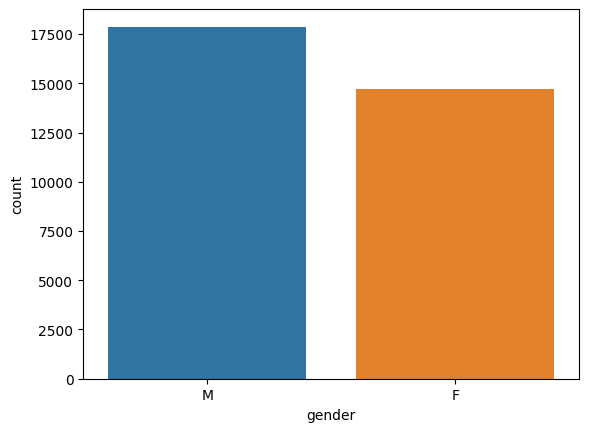

In [111]:
print(si['gender'].value_counts())
sns.countplot(x='gender', data=si)

total 32592 data, dapat dibuktikan bahwa lebih dominan jenis kelamin laki- laki daripada perempuan

<Axes: xlabel='age_band'>

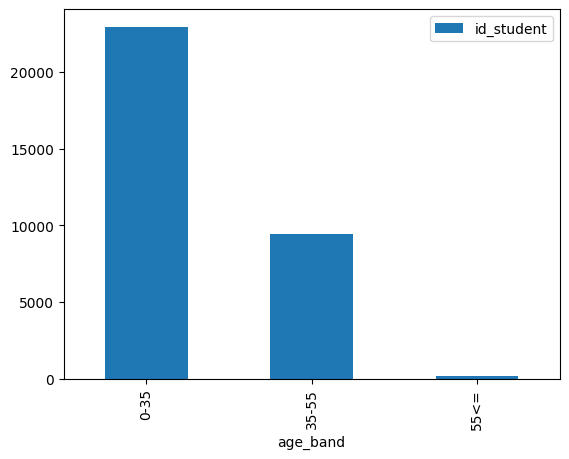

In [113]:
si[['id_student', 'age_band']].groupby(by = 'age_band').count().plot.bar()

kelompok siswa yang sudah terdaftar dengan jumlah terbanyak berasal dari kelompok usia 0-35 tahun 

<Axes: xlabel='region'>

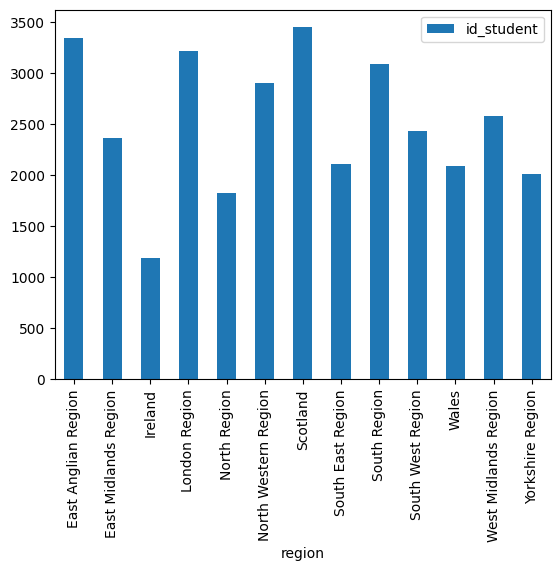

In [115]:
si[['id_student', 'region']].groupby(by = 'region').count().plot.bar()

daerah yang sangat aktif pada platform Vle adalah east anglian, scotland, london region

<Axes: ylabel='region'>

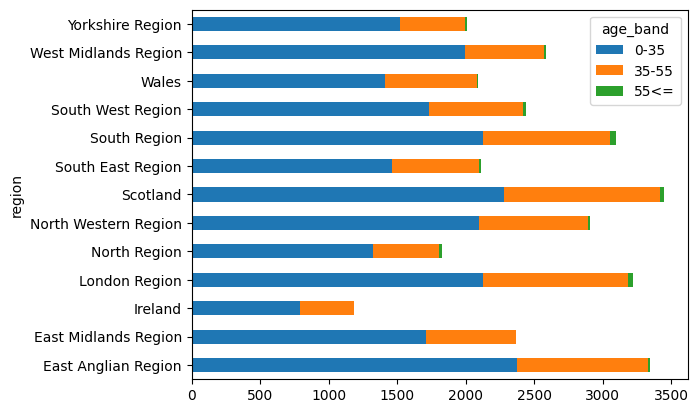

In [116]:
pd.crosstab(si.region, si.age_band).plot.barh(stacked = True)

siswa yang lulus pada kelompok 0-35 tahun dan diikuti oleh kelompok 35-55 tahun.

#### Student Registration

In [117]:
sr

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [119]:
sr.info()
sr.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


,id_student,date_registration,date_unregistration
count,3.259300e+04,32548.000000,10072.000000
mean,7.066877e+05,-69.411300,49.757645
std,5.491673e+05,49.260522,82.460890
min,3.733000e+03,-322.000000,-365.000000
25%,5.085730e+05,-100.000000,-2.000000
50%,5.903100e+05,-57.000000,27.000000
75%,6.444530e+05,-29.000000,109.000000
max,2.716795e+06,167.000000,444.000000


In [121]:
sr.isnull().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [124]:
sr = sr.drop('date_registration', axis=1)
sr = sr.drop('date_unregistration', axis=1)

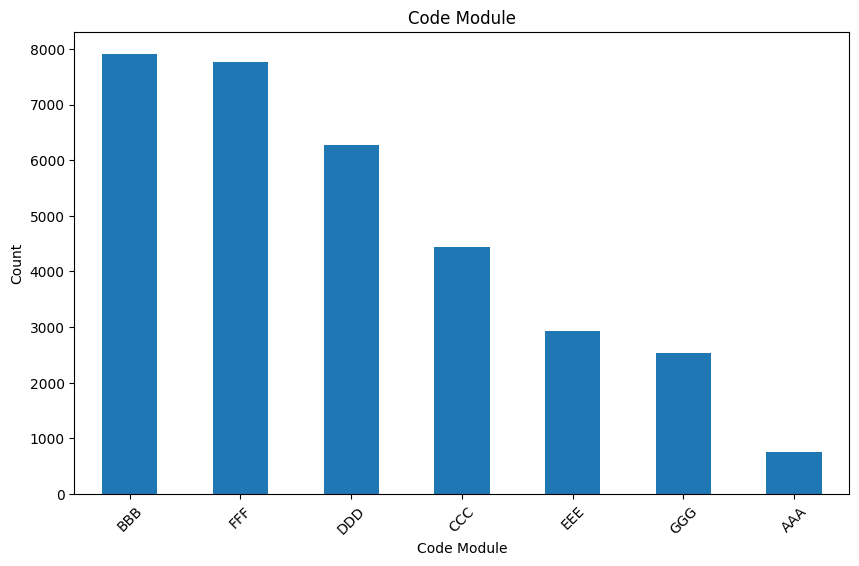

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya, Anda memiliki DataFrame 'df' dengan kolom 'code_module'
counts = sr['code_module'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.xlabel('Code Module')
plt.ylabel('Count')
plt.title('Code Module')
plt.xticks(rotation=45)  # Untuk memutar label sumbu x jika diperlukan
plt.show()

Code module terbanyak terdapat pada code module FFF dan BBB dengan total lebih dari 7000

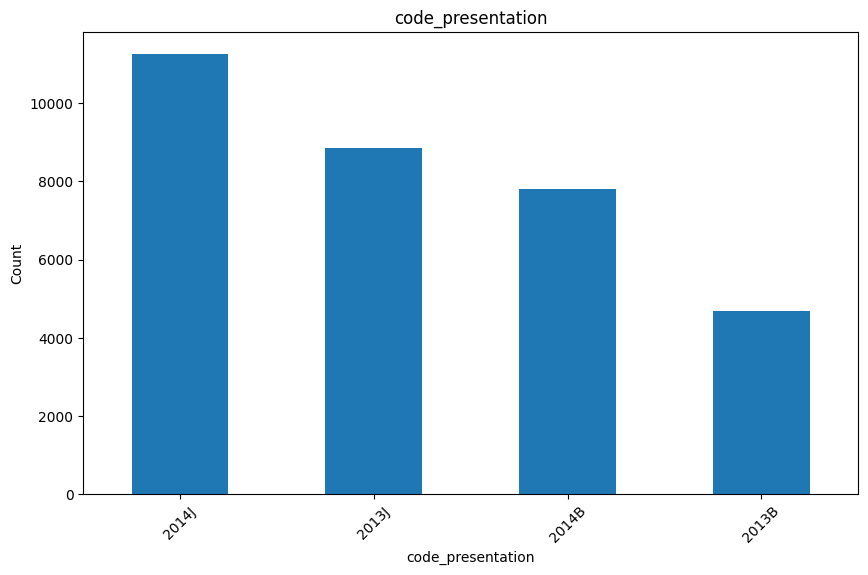

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

# Misalnya, Anda memiliki DataFrame 'df' dengan kolom 'code_module'
counts = sr['code_presentation'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.xlabel('code_presentation')
plt.ylabel('Count')
plt.title('code_presentation')
plt.xticks(rotation=45)  # Untuk memutar label sumbu x jika diperlukan
plt.show()

code presentation terbanyak yaitu 2014 J, sedangkan terendah pada 2013 B

#### Student VLE

In [129]:
svle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [130]:
svle.info()
svle.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


,id_student,id_site,date,sum_click
count,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
mean,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00
max,2.698588e+06,1.049562e+06,2.690000e+02,6.977000e+03


In [131]:
svle.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [143]:
svle = svle.drop('date', axis=1)

In [144]:
svle.nunique()

code_module              7
code_presentation        4
id_student           26074
id_site               6268
sum_click              498
dtype: int64

<Axes: xlabel='sum_click', ylabel='count'>

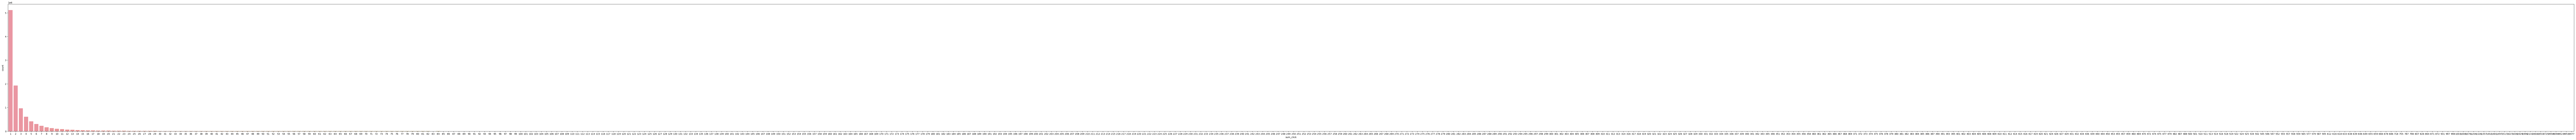

In [150]:
plt.figure(figsize=(200,10))
sns.countplot(data=svle, x="sum_click")


#### VLE

In [151]:
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [157]:
vle = vle.drop('week_from', axis=1)
vle = vle.drop('week_to', axis=1)

In [158]:
ass.info()
ass.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   weight             206 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 8.2+ KB


,id_assessment,weight
count,206.000000,206.000000
mean,26473.975728,20.873786
std,10098.625521,30.384224
min,1752.000000,0.000000
25%,15023.250000,0.000000
50%,25364.500000,12.500000
75%,34891.750000,24.250000
max,40088.000000,100.000000


In [159]:
ass.isnull().sum()

code_module          0
code_presentation    0
id_assessment        0
assessment_type      0
weight               0
dtype: int64

In [160]:
ass.nunique()

code_module            7
code_presentation      4
id_assessment        206
assessment_type        3
weight                24
dtype: int64

<Axes: xlabel='activity_type'>

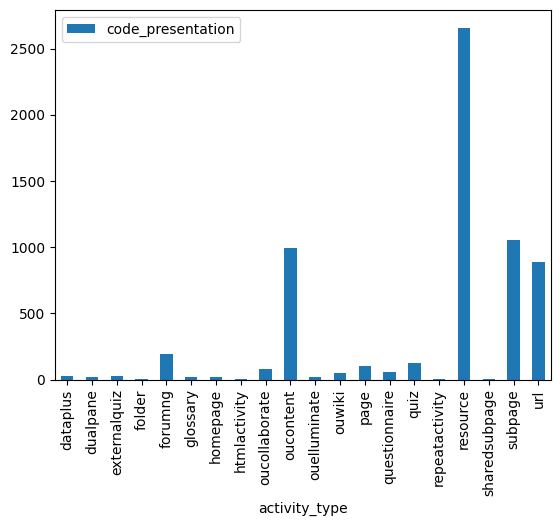

In [161]:
vle[['code_presentation','activity_type']].groupby(by='activity_type').count().plot.bar()


activity type terbanyak yaitu resource